In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

Task 1: Exploratory Data Analysis (EDA)
1.	Load the dataset and perform fundamental data exploration.


In [4]:
df = pd.read_csv("Pharma_Industry.csv")

In [5]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [6]:
df.shape

(500, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [8]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


2.	Utilize histograms, box plots, or density plots to understand feature distributions.


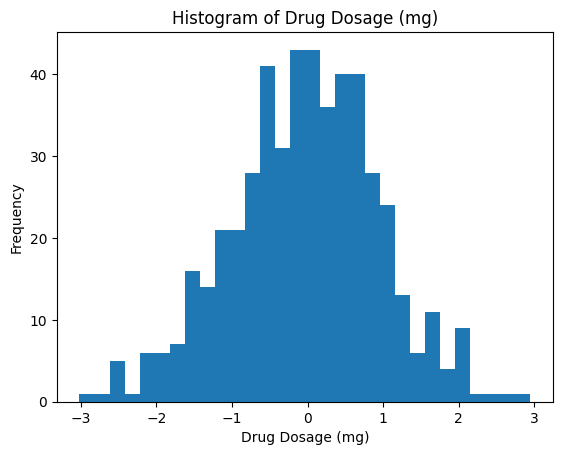

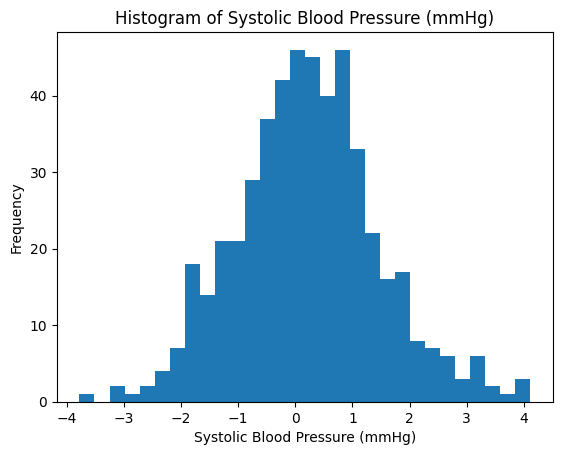

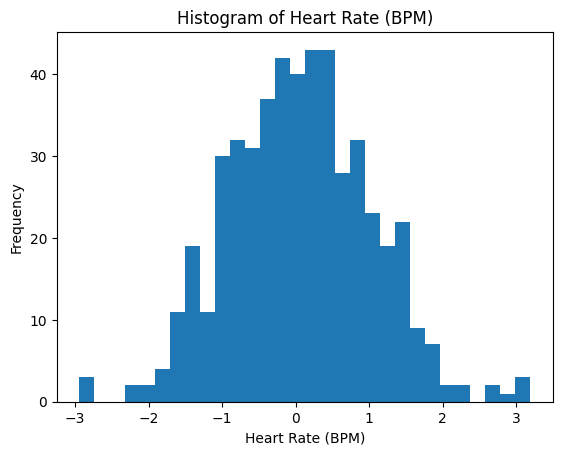

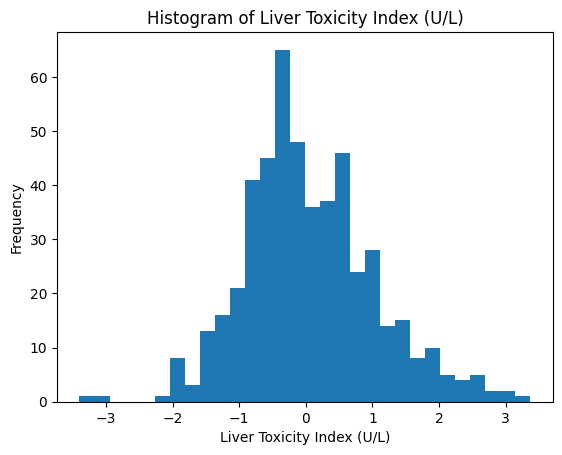

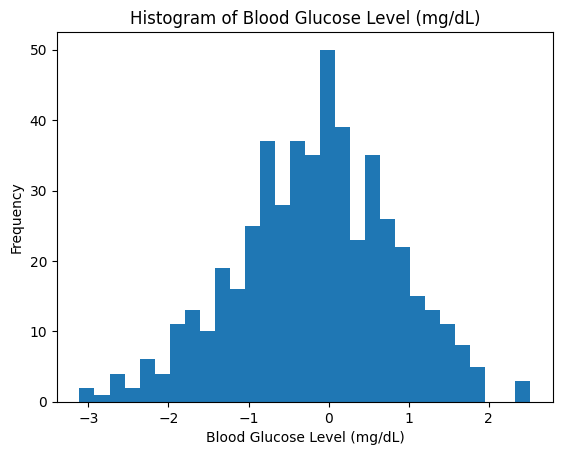

In [ ]:
#histograms for all numerical features
for col in df.columns[:-1]:  # excluding target
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


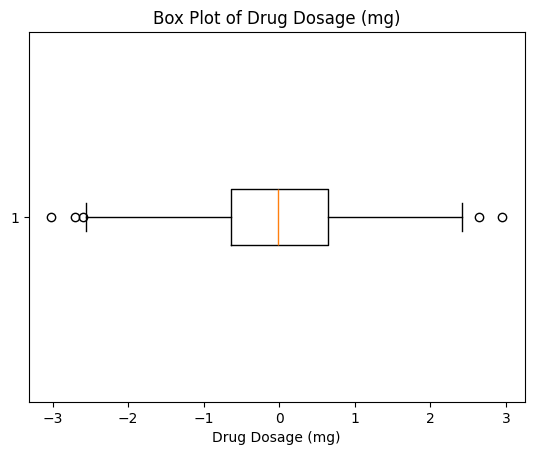

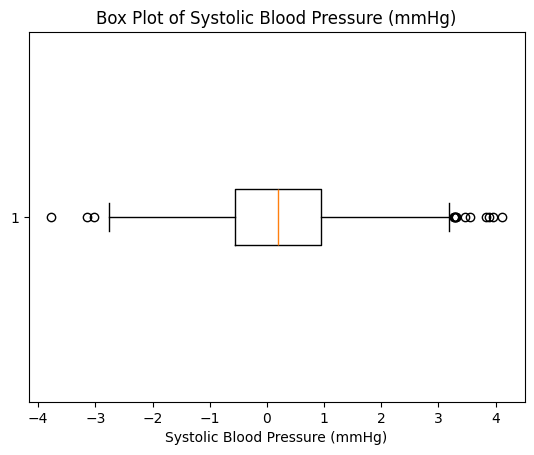

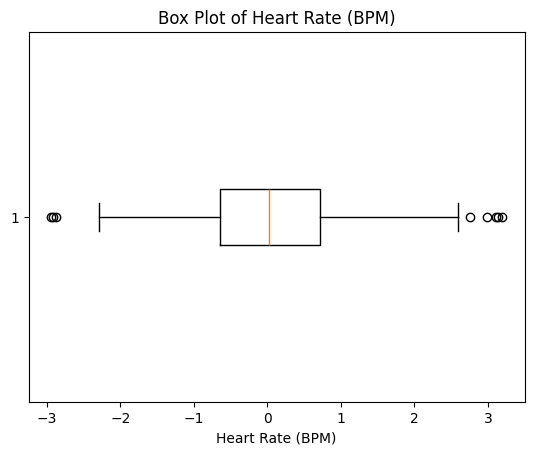

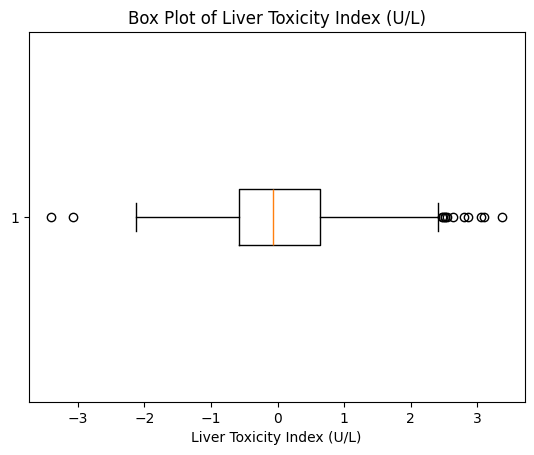

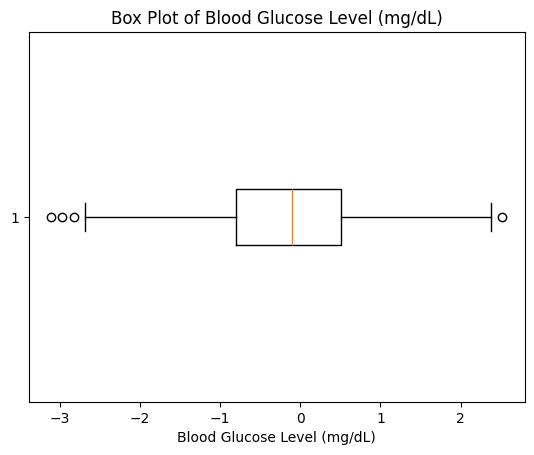

In [ ]:
#Box plots for numerical features
for col in df.columns[:-1]:
    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()


3.	Investigate feature correlations to discern relationships within the data.


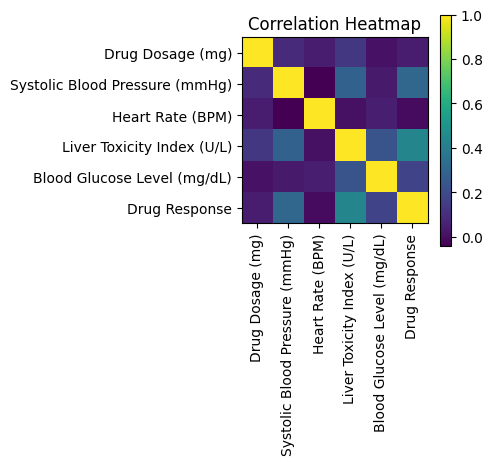

In [ ]:
#Correlation matrix
corr = df.corr()

plt.figure(figsize=(3,3))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#target variable count
df['Drug Response'].value_counts()


Drug Response
1    260
0    240
Name: count, dtype: int64

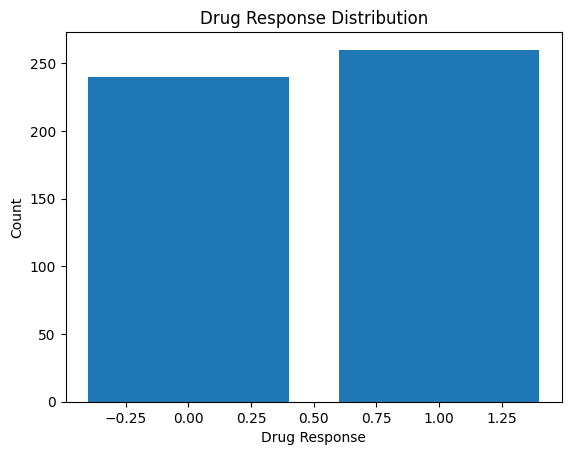

In [ ]:
plt.figure()
plt.bar(df['Drug Response'].value_counts().index,
        df['Drug Response'].value_counts().values)
plt.xlabel("Drug Response")
plt.ylabel("Count")
plt.title("Drug Response Distribution")
plt.show()


Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.


In [14]:
X = df.drop('Drug Response', axis=1)
y = df['Drug Response']

In [ ]:
#train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 5), (100, 5), (400,), (100,))

In [ ]:
#check class distribution
print("Training set distribution:")
print(y_train.value_counts())

print("\nTesting set distribution:")
print(y_test.value_counts())


Training set distribution:
Drug Response
1    208
0    192
Name: count, dtype: int64

Testing set distribution:
Drug Response
1    52
0    48
Name: count, dtype: int64


Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.


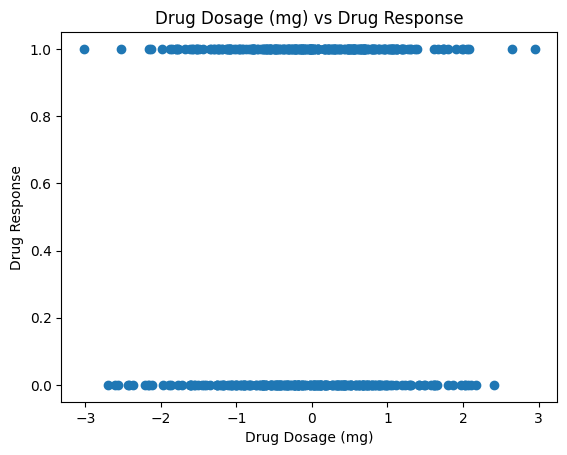

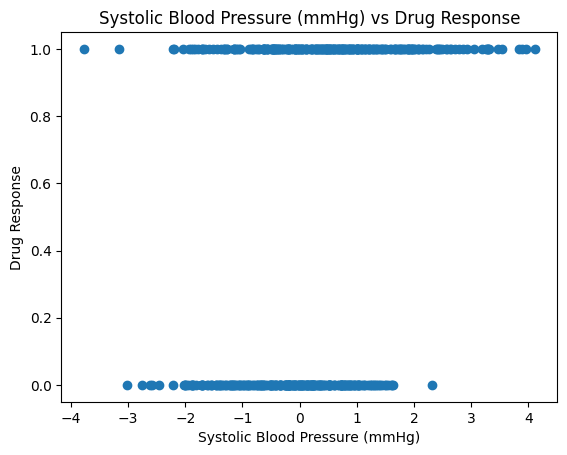

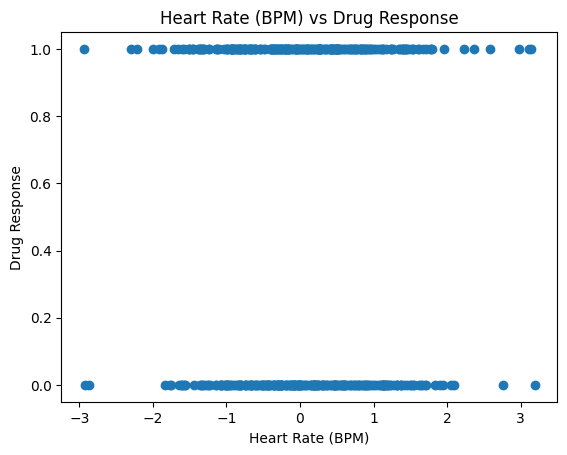

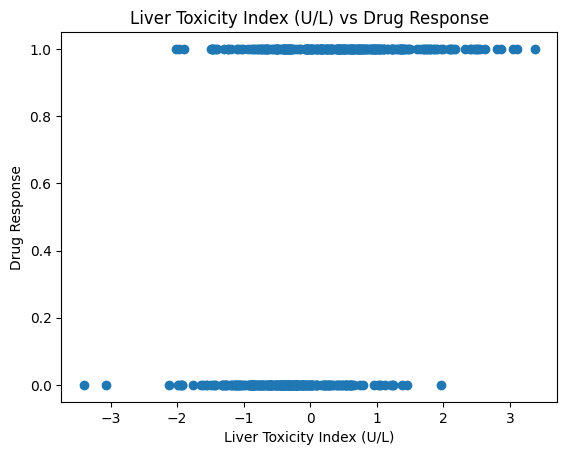

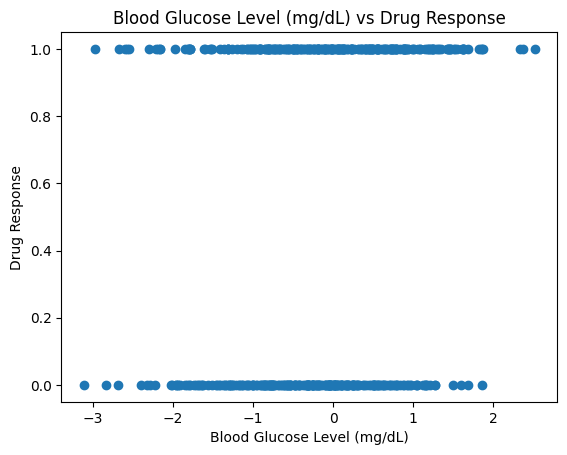

In [ ]:
#scatter plots: Feature vs Target
for col in X.columns:
    plt.figure()
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel("Drug Response")
    plt.title(f"{col} vs Drug Response")
    plt.show()

<Figure size 640x480 with 0 Axes>

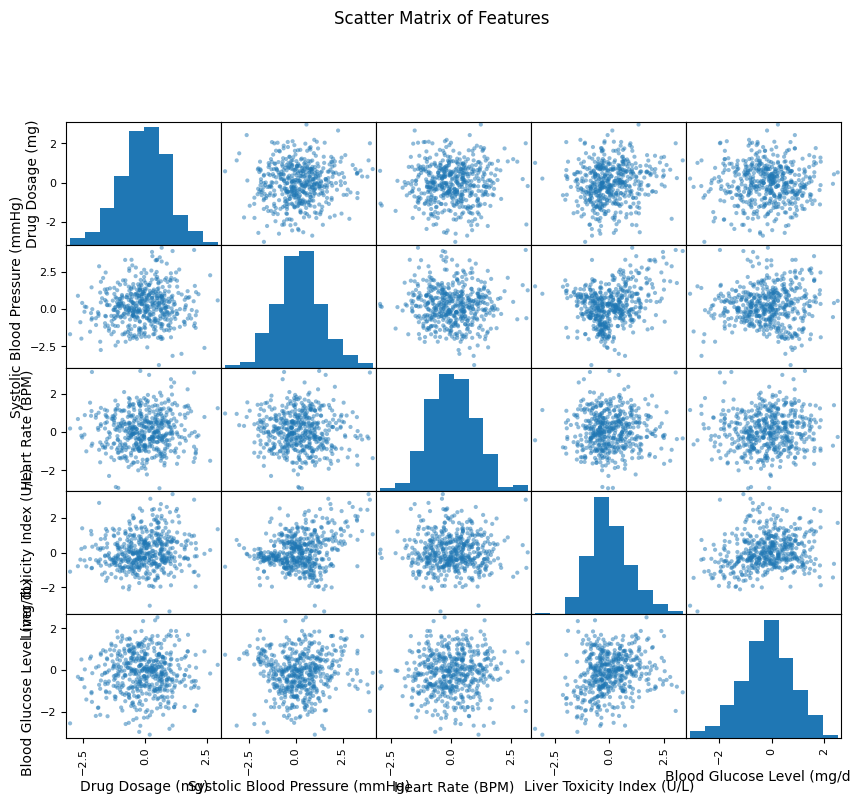

In [19]:
from pandas.plotting import scatter_matrix

plt.figure()
scatter_matrix(X, figsize=(10, 8))
plt.suptitle("Scatter Matrix of Features", y=1.02)
plt.show()


2.	Visualize class distributions to gauge dataset balance or imbalance.

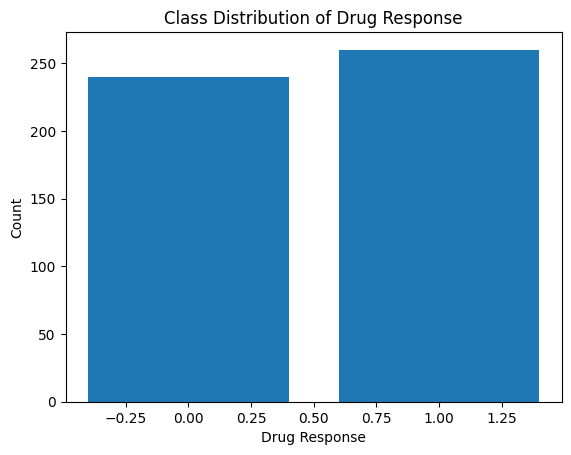

In [ ]:
#class distribution
class_counts = y.value_counts()

plt.figure()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Drug Response")
plt.ylabel("Count")
plt.title("Class Distribution of Drug Response")
plt.show()


Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

In [ ]:
#initialize SVM model
svm_model = SVC(kernel='linear', random_state=42)


2.	Train the SVM model on the training data.

In [ ]:
#train the model
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [23]:
y_pred = svm_model.predict(X_test)

3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [24]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.72

In [25]:
precision = precision_score(y_test, y_pred)
precision

0.7608695652173914

In [26]:
recall = recall_score(y_test, y_pred)
recall

0.6730769230769231

In [27]:
f1 = f1_score(y_test, y_pred)
f1

0.7142857142857143

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.


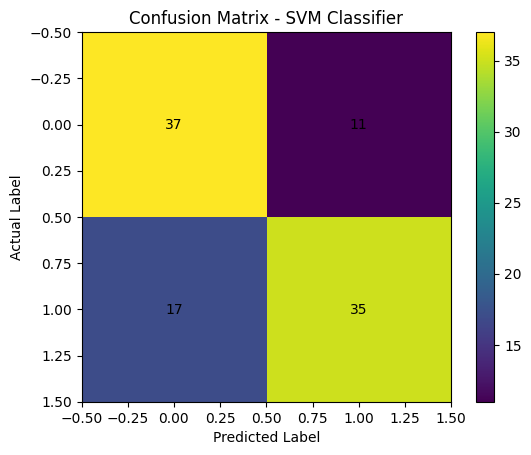

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - SVM Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()

#add values inside the matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [ ]:
#define parameter grid
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [1, 10],
        'gamma': ['scale']
    }
]


In [ ]:
svm = SVC()

grid_search = GridSearchCV(
    svm,
    param_grid,
    cv=3,   #reduced from 5
    scoring='f1',
    verbose=2  #shows progress (IMPORTANT)
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale,

,estimator,SVC()
,param_grid,"[{'C': [0.1, 1, ...], 'kernel': ['linear']}, {'C': [1, 10], 'gamma': ['scale'], 'kernel': ['rbf']}]"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [ ]:
#best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
best_svm = grid_search.best_estimator_

In [ ]:

y_pred_best = best_svm.predict(X_test)

#metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

accuracy_best, precision_best, recall_best, f1_best

(0.78, 0.7678571428571429, 0.8269230769230769, 0.7962962962962963)

In [36]:
print(classification_report(y_test, y_pred_best))
print("Default SVM F1-score:", f1)
print("Tuned SVM F1-score:", f1_best)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        48
           1       0.77      0.83      0.80        52

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100

Default SVM F1-score: 0.7142857142857143
Tuned SVM F1-score: 0.7962962962962963


Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).


In [ ]:
#dictionary to store results
results = []

kernels = {
    "Linear": SVC(kernel='linear', C=1),
    "Polynomial": SVC(kernel='poly', degree=3, C=1),
    "RBF": SVC(kernel='rbf', C=1, gamma='scale')
}

for name, model in kernels.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Kernel": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

#convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Kernel,Accuracy,Precision,Recall,F1-Score
0,Linear,0.72,0.760870,0.673077,0.714286
1,Polynomial,0.72,0.772727,0.653846,0.708333
2,RBF,0.78,0.767857,0.826923,0.796296


2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.

SVM strengths:  
works well in high demand data, effective in small to mediam dataset

SVM weakness:  
sensitive to hyperparameters, not good for very large datasets

based on EDA fearture are already scaled, balanced target variable

based on visualization no severe class imbalanced, non linear pattrens exists

3.	Discuss practical implications of SVM in real-world classification tasks.

healthcare : predict drug responders and non responders, reduce trails cost

advantage in practices : high accuracy, effective in limited data scenarios